# Shallow Neural Network in Keras
## Beginning Notebook

Build a shallow neural network to classify MNIST digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb)

#### Load dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [6]:
# the first 12 digits in the training labels
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

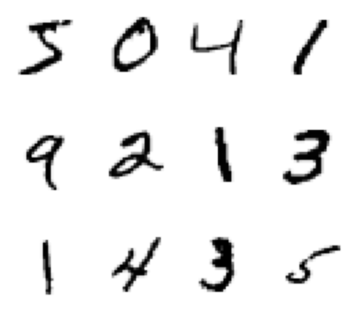

In [7]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
X_valid.shape

(10000, 28, 28)

In [9]:
y_valid.shape

(10000,)

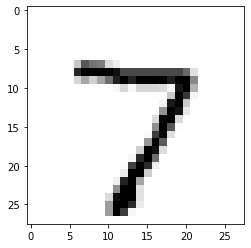

In [10]:
plt.imshow(X_valid[0], cmap='Greys')

In [ ]:
X_valid[0]

In [12]:
y_valid[0]

7

#### Preprocess data
- Reshape the data so that it lines up with the Input and Output layers of the network
- Input data is initially integer values 0-255, so convert those to float and divide by 255 to scale between 0 and 1
- Convert the y(labels) to one-hot encoded outputs representing each of the 10 digits

In [13]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [14]:
X_train /= 255
X_valid /= 255

In [ ]:
X_valid[0]

In [16]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [17]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture
- Just looking at the architecture now
- We will look at the model summary and parameter math later

In [18]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
(64*784)

In [ ]:
(64*784)+64

In [ ]:
(10*64)+10

#### Configure model

- Just run this compile now.
- We will discuss the compile later

    - Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
    - Optimizer —This is how the model is updated based on the data it sees and its loss function.
    - Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [23]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

- A batch is a subset of training data, utilized to render gradient descent managable and productive. 
- We're using batches of size 128 here. This is the number of training points used for a given iteration of the optimizer.
  - Our 60,000 samples will be divided into 469 batches (60k/128=468.75), each with 128 samples
- An epoch is a full pass over the training data. We are making 200 passes over the training data here
  - Each epoch will involve 469 batches
  - With 200 epochs, that means 93,800 total batches processed (200x469)
- val_accuracy is proportion of images in validation set that model got correct

In [24]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 3s 4ms/step - loss: 0.0929 - accuracy: 0.0958 - val_loss: 0.0923 - val_accuracy: 0.1077
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.1094 - val_loss: 0.0918 - val_accuracy: 0.1245
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.1281 - val_loss: 0.0913 - val_accuracy: 0.1451
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.1472 - val_loss: 0.0909 - val_accuracy: 0.1614
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.1642 - val_loss: 0.0905 - val_accuracy: 0.1758
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.1819 - val_loss: 0.0901 - val_accuracy: 0.1926
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.1937 - val_loss: 0.0898 - val_accuracy: 0.2092

In [25]:
# provides the loss and accuracy against a sample
# batch size defaults to 32.  Which means there were 313 batches (10,000 / 32)
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 922us/step - loss: 0.0273 - accuracy: 0.8688


[0.02729223296046257, 0.8687999844551086]